<a href="https://colab.research.google.com/github/ProtossDragoon/Deep-Learning-with-Python/blob/main/chapter6_numpy%EC%97%B0%EC%8A%B5and%ED%85%8D%EC%8A%A4%ED%8A%B8%EC%99%80%EC%8B%9C%ED%80%80%EC%8A%A4%EB%A5%BC%EC%9C%84%ED%95%9C%EB%94%A5%EB%9F%AC%EB%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 작성 : 2020/12/18

- 이 notebook 은 SAI I Team 의 '케라스 창시자에게 배우는 딥러닝' 스터디 참고/멘토링 자료 목적으로 제작되었습니다.
- 이 notebook 을 학습하고자 할 때, 해당 주차의 책을 모두 공부한 후 따라가는 것을 매우 추천합니다.
- 이 코드와 주석에 설명되어있지 않다고 중요하지 않은 내용인 것은 아닙니다. 반드시 책을 선행해 주세요.
- 제작자 github : https://github.com/ProtossDragoon
- 질문 올리는 곳 : 
- 2020년 SAI 동아리원분들께서는, https://github.com/sju-coml/SAI-2020-Team-I/issues 에 질문을 올려주세요.
- contact : dlwkdgn1@naver.com / dlwkdgn3@gmail.com

In [ ]:
try:
  # This %tensorflow_version magic only works in Colab.
  %tensorflow_version 1.x
except Exception:
  pass

# For your non-Colab code, be sure you have tensorflow==1.15
import tensorflow as tf
assert tf.__version__.startswith('1')
print(tf.__version__)

## numpy 복습

numpy 에서 중요하면서 헷갈리고, 비슷한 연산들이 있습니다.

- np.multiply()
- np.dot()
- np.matmul()

그리고 넘파이에서 지칭하는 벡터, 행렬, 텐서의 차원에 대해서 한번 더 짚고 갈 필요가 있습니다.

- 0D : 스칼라 ex. 3
- 1D : 1D 벡터 ex. `[2, 3]` (shape : `2,`) *주의! 이건 행벡터가 아닙니다. 일반적인 수학에서 벡터를 세로로 세워서 표현하듯 열벡터입니다!
- 2D : 행렬 ex. `[[2,3]]` (shape : `[1,2]`)

### np.multiply()

2D * 2D 의 예시

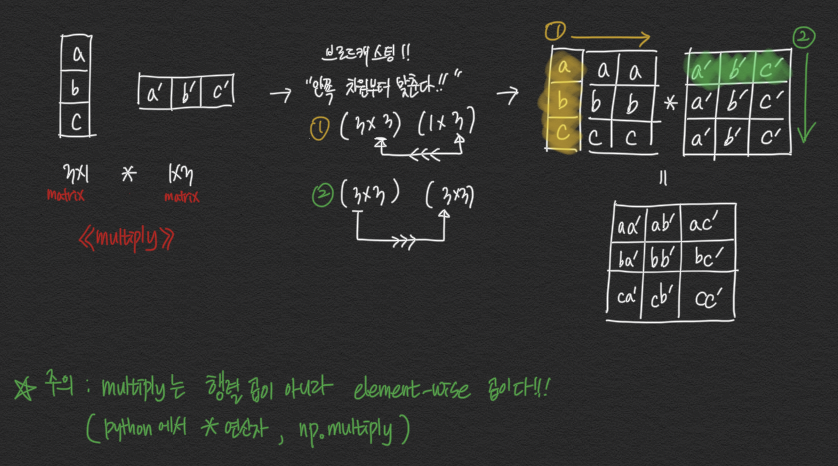

3D * 3D 의 예시

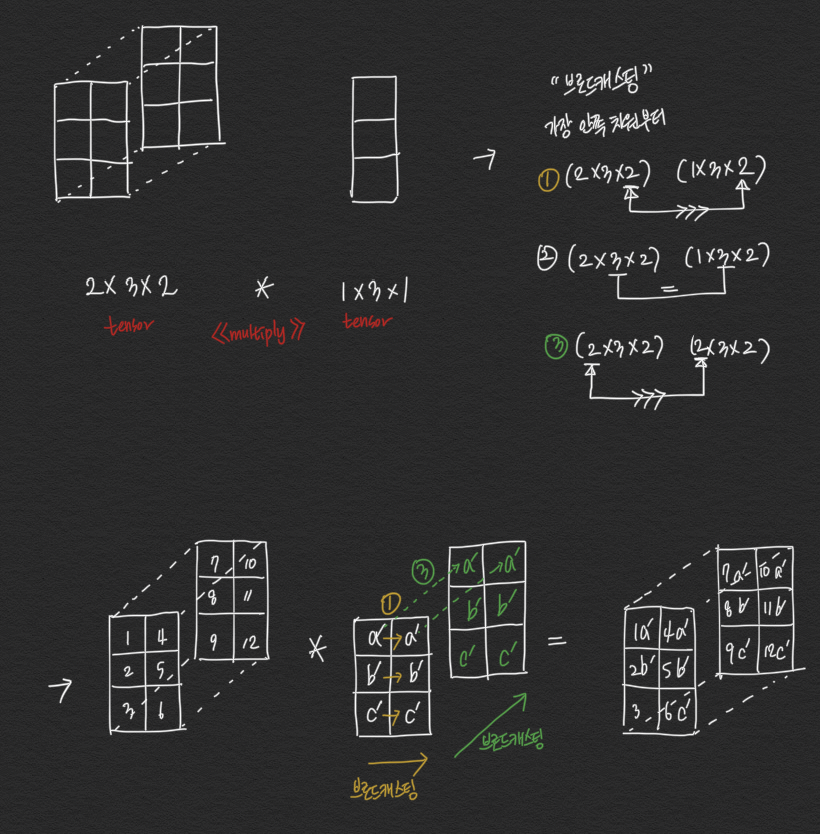

In [30]:
import numpy as np

a1 = np.array([1, 2, 3])
print(a1.shape)
a2 = np.array([[1],[2],[3]])
print(a2.shape)
a3 = np.array([[1, 2, 3]])
print(a3.shape)

def mul(a, w):
    # multiply 는 꾸역꾸역 맞춘다.
    # 하지만 딱 떨어지지 않으면 연산이 불가능하다.
    print('\n', a.shape, '*', w.shape, '=', (a*w).shape)
    print(a*w, '\n')

w1 = np.array([6, 3, 2])
w2 = np.array([[6], [3], [2]])
w3 = np.array([[6, 3, 2]])

print('----')
mul(a1, w1)
print('----')
mul(a1, w2)
print('----')
mul(a1, w3)
print('----')
mul(a2, w1)
print('----')
mul(a2, w2)
print('----')
mul(a2, w3)
print('----')
mul(a3, w1)
print('----')
mul(a3, w2)
print('----')
mul(a3, w3)

(3,)
(3, 1)
(1, 3)
----

 (3,) * (3,) = (3,)
[6 6 6] 

----

 (3,) * (3, 1) = (3, 3)
[[ 6 12 18]
 [ 3  6  9]
 [ 2  4  6]] 

----

 (3,) * (1, 3) = (1, 3)
[[6 6 6]] 

----

 (3, 1) * (3,) = (3, 3)
[[ 6  3  2]
 [12  6  4]
 [18  9  6]] 

----

 (3, 1) * (3, 1) = (3, 1)
[[6]
 [6]
 [6]] 

----

 (3, 1) * (1, 3) = (3, 3)
[[ 6  3  2]
 [12  6  4]
 [18  9  6]] 

----

 (1, 3) * (3,) = (1, 3)
[[6 6 6]] 

----

 (1, 3) * (3, 1) = (3, 3)
[[ 6 12 18]
 [ 3  6  9]
 [ 2  4  6]] 

----

 (1, 3) * (1, 3) = (1, 3)
[[6 6 6]] 



### np.dot(), np.matmul()

np.dot() 은 벡터의 점곱, 벡터의 내적, 행렬의 곱이라고 생각하면 됩니다.
- 주의1. 벡터와 벡터를 내적할 때에는 np.dot() 을 사용하는 것이 좋습니다.
- 주의2. 행렬과 벡터의 곱, 행렬과 행렬의 곱


## RNN 의 정확한 이해

In [ ]:
import numpy as np

time_steps = 100
input_features_vector_dimension = 8 # input = [a, b, c, d, e, f, g, h]
output_features_vector_dimension = 4 # output = [w, x, y, z]

In [ ]:
inputs = np.random.random([time_steps, input_features_vector_dimension])
inputs.shape

# 세로로 (행) 100줄
# 가로로 (열) 8줄
# 세로로 한 줄 마다, 하나의 벡터 [a, b, c, d, e, f, g, h] 가 있는 것이고,
# 하나의 벡터 [a, b, c, d, e, f, g, h] 는 하나의 토큰을 의미하겠지요.

(100, 8)

In [ ]:
state_t = np.zeros([output_features_vector_dimension])
state_t.shape

# RNN 은 최종 state 와 모델의 output 이 동일한 모델입니다. 그림을 참고하세요.

(4,)

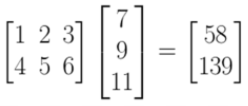

위같은 식이 됩니다. 가중치는 2D 행렬, 데이터 `[a, b, c, d, e, f, g, h]` 는 벡터.

In [41]:
weight_matrix_for_input = np.random.random([output_features_vector_dimension, input_features_vector_dimension])
print(weight_matrix_for_input.shape, "*", inputs[0].shape, )
# input 1d vector [a, b, c, d, e, f, g, h] shape (8,) 에 곱해지는 가중치입니다.
# 당연히 (?, 8) 이어야겠지요.
# 이 연산의 결과물 vector 은 current state vector 과 덧셈을 할 수 있어야 하므로, 동일한 output_feature_vector_dimension 과 동일한 크기가 나와야 합니다.
# 그러므로, (4, 8) 가 되어야겠지요?
# 아까 나왔던 100은 time_steps 임을 기억하세요!

weight_matrix_for_past_state = np.random.random([output_features_vector_dimension, output_features_vector_dimension])
print(weight_matrix_for_past_state.shape, "*", state_t.shape)
# 이전 state (4,) 에 곱해지는 가중치입니다.
# 당연히 (?, 4) 이어야겠지요.
# 이 연산의 결과물 vector 은 weight_matrix_for_input * inputs 의 결과물인 (time_steps, 4) 와 더할 수 있어야 하므로
# (4, 4) 가 되어야겠지요?
# (4, 4) * (4, 1) = (4, 1) 이니까요.

bias = np.random.random([output_features_vector_dimension])
print(bias.shape)

(4, 8) * (8,)
(4, 4) * (4,)
(4,)


In [36]:
successive_outputs = []

for input_t in inputs: 
    # time_steps 마다 하나씩 넣어주는 것. input_t 에는 1개 time_step 에 해당하는 벡터 [a, b, c, d, e, f, g, h] 가 차례대로 할당됨.
    # python 의 곱셈기호 * 는 multiply 연산!
    # 행렬 곱을 하거나 내적 연산을 하고 싶다면 np.dot() 또는 np.matmul()
    
    print(input_t.shape, weight_matrix_for_input.shape, '+', state_t.shape, weight_matrix_for_past_state.shape, '+', bias.shape)
    
    output_t = np.tanh(np.matmul(input_t, weight_matrix_for_input) + np.matmul(state_t, weight_matrix_for_past_state) + bias)
    
    successive_outputs.append(output_t)

    state_t = output_t

(8,) (8, 4) + (4,) (4, 4) + (4,)
(8,) (8, 4) + (4,) (4, 4) + (4,)
(8,) (8, 4) + (4,) (4, 4) + (4,)
(8,) (8, 4) + (4,) (4, 4) + (4,)
(8,) (8, 4) + (4,) (4, 4) + (4,)
(8,) (8, 4) + (4,) (4, 4) + (4,)
(8,) (8, 4) + (4,) (4, 4) + (4,)
(8,) (8, 4) + (4,) (4, 4) + (4,)
(8,) (8, 4) + (4,) (4, 4) + (4,)
(8,) (8, 4) + (4,) (4, 4) + (4,)
(8,) (8, 4) + (4,) (4, 4) + (4,)
(8,) (8, 4) + (4,) (4, 4) + (4,)
(8,) (8, 4) + (4,) (4, 4) + (4,)
(8,) (8, 4) + (4,) (4, 4) + (4,)
(8,) (8, 4) + (4,) (4, 4) + (4,)
(8,) (8, 4) + (4,) (4, 4) + (4,)
(8,) (8, 4) + (4,) (4, 4) + (4,)
(8,) (8, 4) + (4,) (4, 4) + (4,)
(8,) (8, 4) + (4,) (4, 4) + (4,)
(8,) (8, 4) + (4,) (4, 4) + (4,)
(8,) (8, 4) + (4,) (4, 4) + (4,)
(8,) (8, 4) + (4,) (4, 4) + (4,)
(8,) (8, 4) + (4,) (4, 4) + (4,)
(8,) (8, 4) + (4,) (4, 4) + (4,)
(8,) (8, 4) + (4,) (4, 4) + (4,)
(8,) (8, 4) + (4,) (4, 4) + (4,)
(8,) (8, 4) + (4,) (4, 4) + (4,)
(8,) (8, 4) + (4,) (4, 4) + (4,)
(8,) (8, 4) + (4,) (4, 4) + (4,)
(8,) (8, 4) + (4,) (4, 4) + (4,)
(8,) (8, 4

In [44]:
final_output_sequence = np.stack(successive_outputs, axis=0) # 0 번째 차원, 즉 가장 바깥쪽 차원 방향으로 리스트에 들어 있는 100개의 원소들을 차곡차곡 쌓아 나갑니다.
print(final_output_sequence.shape)

(100, 4)


RNN 에서 아래 둘은 feed-forward 시에 값이 변하지 않고 일정하다는 사실을 알 수 있습니다.

- weight_matrix_for_input
- weight_matrix_for_past_state
